# A taste of machine learning
in this problem, you are going to build a simple Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset. Your final score 
will be 10*accuracy and will be rounded to the nearest integer.  

here is some introductory videos if you are interested:  
[What is neural networks](https://youtu.be/aircAruvnKk?si=dUNNhR6OPWGzUDJ1)  
[How neural networks learn](https://youtu.be/IHZwWFHWa-w?si=3IIAgKVLPBKKYDPJ)    
[Backpropagation](https://youtu.be/Ilg3gGewQ5U?si=1PQ-P2q0t31Gi__j)


In [1]:
# do not modify this cell
import torch
import torch.nn as nn
import torchvision as tv
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
transform = tv.transforms.ToTensor()
train_data = tv.datasets.MNIST("MNIST/", train=True, download=True,
                                 transform=transform)
test_data = tv.datasets.MNIST("MNIST/", train=False, download=True,
                                transform=transform)

print(f"Train data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}")

100%|██████████| 9.91M/9.91M [00:00<00:00, 20.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 500kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.63MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 13.4MB/s]

Train data size: 60000
Test data size: 10000


Image shape: torch.Size([1, 28, 28])
Label of first image: 5


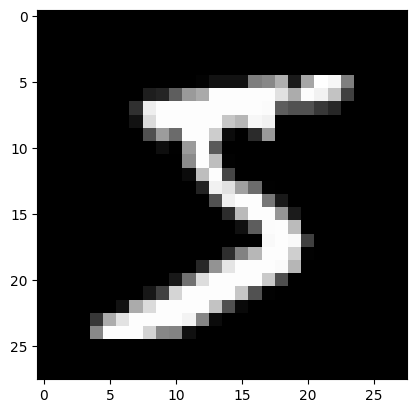

In [3]:
# do not modify this cell
print(f"Image shape: {train_data[0][0].shape}")
print(f"Label of first image: {train_data[0][1]}")
plt.imshow(train_data[0][0].squeeze(), cmap='gray')

[convolutional and Pooling layer](https://www.youtube.com/watch?v=FD-3FU2VbQc)  
[Linear and ReLU layer](https://ashwinhprasad.medium.com/pytorch-for-deep-learning-nn-linear-and-nn-relu-explained-77f3e1007dbb)

In [ ]:


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # TODO


    def forward(self, x):
        # TODO

        return x

In [ ]:

# Detect device (MPS for Apple Silicon, CUDA for NVIDIA GPU, else CPU)
device = torch.device("mps" if torch.backends.mps.is_available() else ("cuda" if torch.cuda.is_available() else "cpu"))
print("Using device:", device)
model = CNN().to(device)

# =======================
# TODO
# modify these parameters
epochs = 80
batch_size = 300
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# =======================


# =======================
# do not modify the code below
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=batch_size,
                                          shuffle=False)

for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 1, 28, 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.view(-1, 1, 28, 28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Epoch [{epoch+1}/{epochs}], Test Accuracy: {100 * correct / total:.2f}%")





Using device: cuda
Epoch [1/80], Loss: 1.8798
Epoch [1/80], Test Accuracy: 49.77%
Epoch [2/80], Loss: 1.6602
Epoch [2/80], Test Accuracy: 50.39%
Epoch [3/80], Loss: 1.4696
Epoch [3/80], Test Accuracy: 51.28%
Epoch [4/80], Loss: 1.3197
Epoch [4/80], Test Accuracy: 51.36%
Epoch [5/80], Loss: 1.2239
Epoch [5/80], Test Accuracy: 51.45%
Epoch [6/80], Loss: 1.1363
Epoch [6/80], Test Accuracy: 51.57%
Epoch [7/80], Loss: 1.0752
Epoch [7/80], Test Accuracy: 51.53%
Epoch [8/80], Loss: 0.9715
Epoch [8/80], Test Accuracy: 51.25%
Epoch [9/80], Loss: 1.0081
Epoch [9/80], Test Accuracy: 51.57%
Epoch [10/80], Loss: 0.8992
Epoch [10/80], Test Accuracy: 51.35%
Epoch [11/80], Loss: 0.9791
Epoch [11/80], Test Accuracy: 51.48%
Epoch [12/80], Loss: 0.9181
Epoch [12/80], Test Accuracy: 51.50%
Epoch [13/80], Loss: 0.9136
Epoch [13/80], Test Accuracy: 51.34%
Epoch [14/80], Loss: 0.8581
Epoch [14/80], Test Accuracy: 50.92%
Epoch [15/80], Loss: 0.8911
Epoch [15/80], Test Accuracy: 51.44%
Epoch [16/80], Loss: 0.8

Predicted label for the first test image: 2
Actual label for the first test image: 2


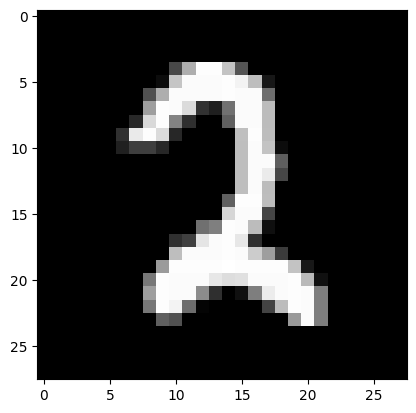

In [13]:
from random import randint
i = randint(0, len(test_data)-1)
image = test_data[i][0].unsqueeze(0).to(device)  # Add batch dimension
output = model(image)
_, predicted_label = torch.max(output.data, 1)
print(f"Predicted label for the first test image: {predicted_label.item()}")
print(f"Actual label for the first test image: {test_data[i][1]}")
plt.imshow(test_data[i][0].squeeze(), cmap='gray')

In [ ]:
# Do not modify the code below
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 1, 28, 28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {100 * correct / total:.2f}%")
    print(f"Your Score: {round(10 * correct/total)}")


Test Accuracy: 80.04%
Your Score: 32
